## Satellite Image Analysis

In [2]:
import rasterio as rio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

* Import images

In [3]:
imagePath = 'C:/Users/sudha.gcupadhaya/Desktop/remote sensing/satellite images/'
band2= rio.open('satellite images/LC08_L1TP_044028_20200622_20200707_01_T1_B2.tif') #blue
band3= rio.open('satellite images/LC08_L1TP_044028_20200622_20200707_01_T1_B3.tif')#green
band4= rio.open('satellite images/LC08_L1TP_044028_20200622_20200707_01_T1_B4.tif')#red
band5= rio.open('satellite images/LC08_L1TP_044028_20200622_20200707_01_T1_B5.tif')#nir
band10= rio.open('satellite images/LC08_L1TP_044028_20200622_20200707_01_T1_B10.tif')#thermal infrared 1
band11= rio.open('satellite images/LC08_L1TP_044028_20200622_20200707_01_T1_B11.tif')#thermal infrared 2

* Check

In [3]:
band4.crs

In [4]:
band4.transform

Affine(30.0, 0.0, 205485.0,
       0.0, -30.0, 5220315.0)

In [5]:
band4.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

* Visualize red and nir with green color

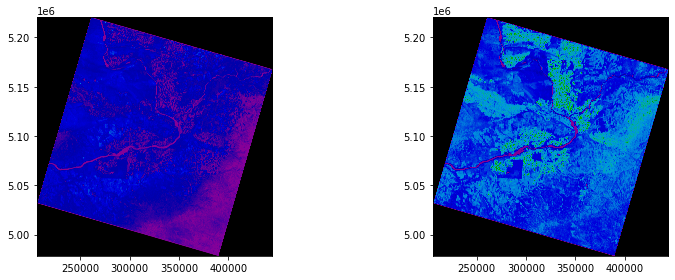

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plot.show(band4, ax=ax1, cmap='nipy_spectral')
plot.show(band5, ax=ax2, cmap='nipy_spectral')

fig.tight_layout()

* Change red and nir to numpy and float64 file type

In [23]:
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')
green = band3.read(1).astype('float64')
blue = band2.read(1).astype('float64')

In [8]:
savi = ((nir-red)/(nir+red+0.5)) *(1.5)

### Calculate NDVI

In [9]:
ndvi = np.where((nir+red) ==0,0, (nir-red)/(nir+red))

C:\Users\sudha.gcupadhaya\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


* Check range

In [10]:
print(ndvi.shape)
np.min(ndvi), np.max(ndvi),np.mean(ndvi)

(8061, 7951)


(-1.0, 1.0, 0.14305815364143387)

* Save NDVI image

In [11]:
ndviImage = rio.open('satellite images/ndviImage.tiff', 'w', driver = 'Gtiff',
                    width = band4.width, height = band4.height,
                    count =1,
                    crs = band4.crs,
                    transform = band4.transform,
                    dtype = 'float64')
ndviImage.write(ndvi,1)
ndviImage.close()

* Visulaize NDVI image

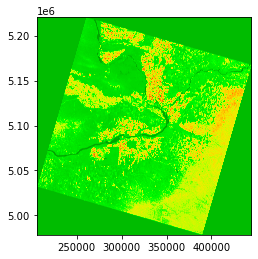

In [12]:
ndvi1 = rio.open('satellite images/ndviImage.tiff')
plot.show(ndvi1, alpha =1, cmap = 'nipy_spectral' )

In [13]:
import pandas as pd
df_ndvi = pd.DataFrame(ndvi)
df_ndvi.to_csv('C:/Users/sudha.gcupadhaya/Desktop/My research projects/remote sensing/satellite images/df_ndvi.csv', index = False)

### Calculate GNDVI

In [5]:
gndvi = np.where((nir+green) ==0,0, (nir-green)/(nir+green))

C:\Users\sudha.gcupadhaya\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


* Check range

In [6]:
print(gndvi.shape)
np.min(gndvi), np.max(gndvi),np.mean(gndvi)

(8061, 7951)


(-1.0, 1.0, 0.14484577562528153)

* Save GNDVI image

In [7]:
gndviImage = rio.open('satellite images/gndviImage.tiff', 'w', driver = 'Gtiff',
                    width = band4.width, height = band4.height,
                    count =1,
                    crs = band4.crs,
                    transform = band4.transform,
                    dtype = 'float64')
gndviImage.write(gndvi,1)
gndviImage.close()

* Visulaize GNDVI image

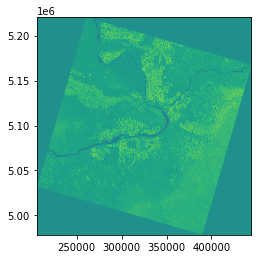

In [8]:
gndvi = rio.open('satellite images/gndviImage.tiff')
plot.show(gndvi, alpha =1)

### Visualize red blue green images

* Visulaize Blue, Green and Red bands

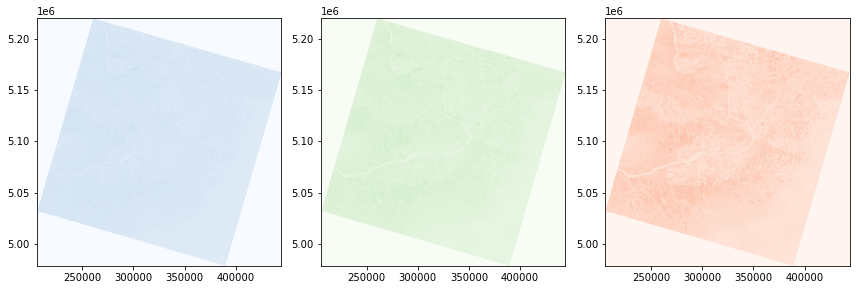

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

### True color Image

* develop rgb image

In [ ]:
truecolor=rasterio.open('satellite images/truecolor.tiff','w' ,driver='Gtiff', width=band4.width, 
                        height=band4.height, count=3, crs=band4.crs, 
                       transform=band4.transform, dtype=band4.dtypes[0])
truecolor.write(band2.read(1),3) #blue
truecolor.write(band3.read(1),2) #green
truecolor.write(band4.read(1),1) #red
truecolor.close()

* Visualize RGB image

In [ ]:
truecolor.read().shape

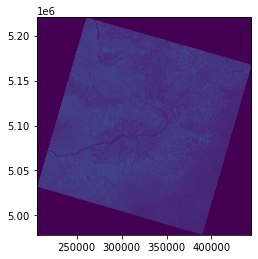

In [10]:
truecolor= rio.open('satellite images/truecolor.tiff') 
plot.show(truecolor, alpha =1)

### False color image

* False color image

In [13]:
nir = band5.read(1)
green = band3.read(1)
red = band4.read(1)

In [14]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

In [15]:
nirn = normalize(nir)
redn = normalize(red)
greenn = normalize(green)

In [16]:
nrg = np.dstack((nirn, redn, greenn))

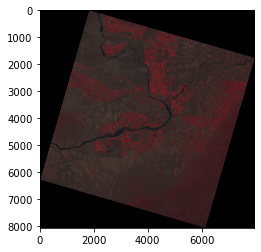

In [17]:
plt.imshow(nrg)

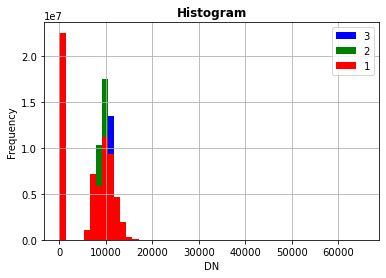

In [18]:
truecolor=rio.open('satellite images/truecolor.tiff')
plot.show_hist(truecolor, bins=50, lw=0.0, stacked=False, alpha=1, histtype='stepfilled', title='Histogram')

### Soil Adjusted Vegetation Index (SAVI)

In [24]:
savi = ((nir-red)/(nir+red+0.5)) *(1.5)

* Check range

In [25]:
print(savi.shape)
np.min(savi), np.max(savi),np.mean(savi)

(8061, 7951)


(-1.499951331884105, 1.4999740228252776, 0.21458319011224525)

* Save NDVI image

In [26]:
saviImage = rio.open('satellite images/saviImage.tiff', 'w', driver = 'Gtiff',
                    width = band4.width, height = band4.height,
                    count =1,
                    crs = band4.crs,
                    transform = band4.transform,
                    dtype = 'float64')
saviImage.write(savi,1)
saviImage.close()

* Visulaize NDVI image

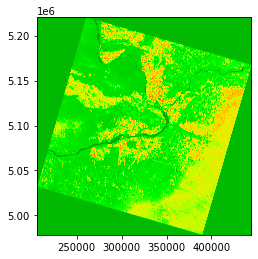

In [27]:
savi1 = rio.open('satellite images/saviImage.tiff')
plot.show(savi1, alpha =1, cmap = 'nipy_spectral' )